# Data Visualization

## Some Data Visualization Library For Python:

### *Matplotlib 
### *Pandas 
### *Seaborn 
### *ggplot 
### *Bokeh 
### *plot.ly

In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
df=titanic.copy()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [3]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [7]:
import pandas as pd
df.sex=pd.Categorical(df.sex) #you can covert object to category for variables.
df.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [8]:
df.shape

(891, 15)

In [9]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
df.isnull().values.any() #check if there is any non value - true or false

True

In [12]:
df.isnull().sum() #number of non value for each variable

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
df['age'].fillna(0,inplace=True)
df['age'].fillna(df.mean(),inplace=True)
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
categories_df=df.select_dtypes(include=["category"])
categories_df.sex.unique()

[male, female]
Categories (2, object): [male, female]

In [25]:
categories_df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

## Barplot - for visualization to categorical variables.

In [34]:
from pandas.api.types import CategoricalDtype
df.alive.head(10)

0     no
1    yes
2    yes
3    yes
4     no
5     no
6     no
7     no
8    yes
9    yes
Name: alive, dtype: object

Text(0.5, 1.0, 'alive in titanic')

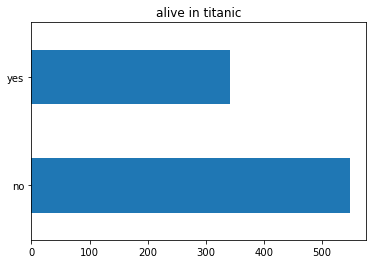

In [38]:
bar_alive=df['alive'].value_counts().plot.barh();
bar_alive.set_title('alive in titanic')

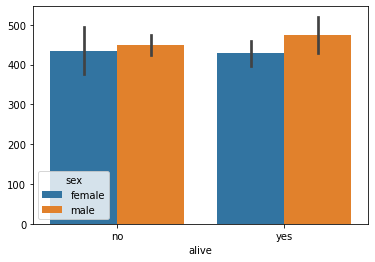

In [49]:
sns.barplot(x='alive',y=df.alive.index, hue='sex',data=df)

## Distplot - show distribution of numerical variables

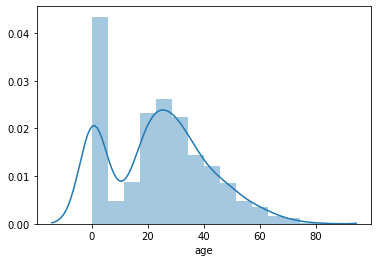

In [61]:
sns.distplot(df.age,kde=True) #kde is density option

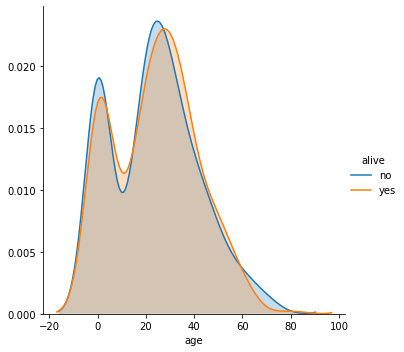

In [56]:
(sns
 .FacetGrid(df,hue='alive',height=5)
 .map(sns.kdeplot,'age',shade=True)
 .add_legend()
)

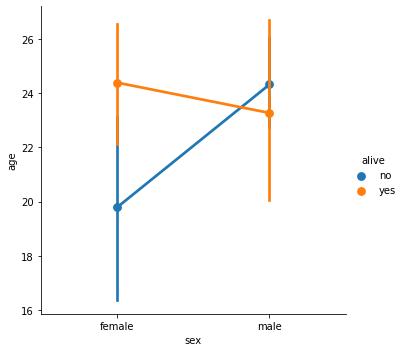

In [57]:
sns.catplot(x='sex',y='age',hue='alive',kind='point',data=df)

## Boxplot - Numerical data visualization

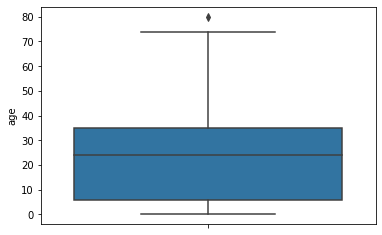

In [65]:
sns.boxplot(x=df['age'],orient='v')

In [66]:
df.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

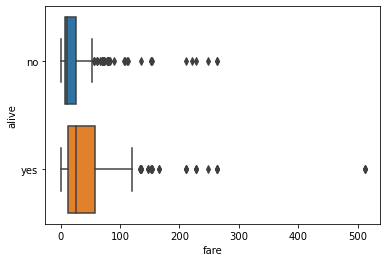

In [80]:
sns.boxplot(x='fare',y='alive',data=df)

## Violin Graph - density and box plot together

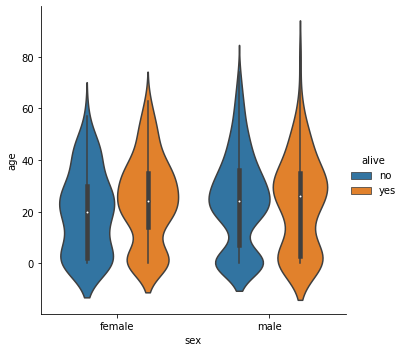

In [86]:
sns.catplot(x='sex',y='age',hue='alive',kind='violin',data=df)

## correlation chart - ScatterPlot